# Keras: Time Series Anomaly
***

This Jupyter notebook will contain a clear and concise overview of how to load CAO points information from the CAO website into a pandas data frame, a detailed comparison of the level 8 CAO points in 2019, 2020, and 2021 and some visualisations to enhance the viewer experience.

<br>

# From Ian's Notebook

***

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

## Evaluation
***

In [1]:
# Numerical arrays
import numpy as np

# Spreadsheet-like Data Frames
import pandas as pd

# Neural networks
import tensorflow.keras as keras

# Plotting
import matplotlib.pyplot as plt

<br>

## Data
***

https://www.kaggle.com/datasets/boltzmannbrain/nab

https://github.com/numenta/NAB

In this section, we will gather the data for the project, import the data into dataframes, check that the data looks OK and do an inital plot of the data so we can take a look at what we're working with.

In [2]:
# Root of URLs
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [3]:
# Checking the no anomaly URL looks OK
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [4]:
# Checking the with anomaly URL looks OK
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

In [5]:
# Reading the no anomaly data into a data frame called small noise
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [6]:
# Taking a look at the top 5 values in the data frame
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [7]:
# Using describe to check how many lines are in the data & see some basic stats
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [8]:
# Taking a look at the first value in the data frame
#df_small_noise.iloc[0]
#df_small_noise.iloc[0].values[0]
df_small_noise.iloc[0]['value']

18.3249185392

In [9]:
# Use shape method to see how many values are in the data frame
df_small_noise.shape

(4032, 1)

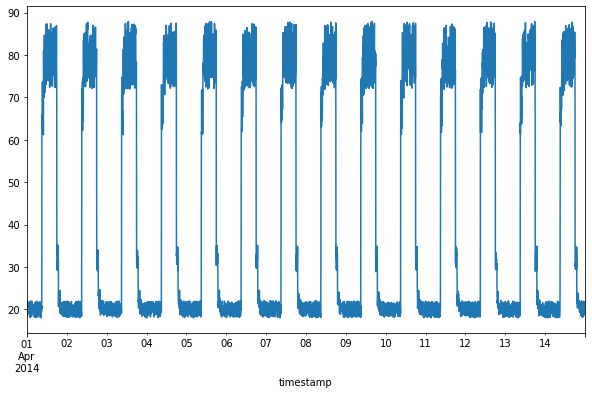

In [10]:
# Creating a subplot
fig, ax = plt.subplots(figsize=(10,6))

# Use pandas to plot the data frame
df_small_noise.plot(legend=False, ax=ax);

In [11]:
# Reading the with anomaly data into a data frame called daily jumpsup
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [12]:
# Have a look at the top 5 values
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [13]:
# Using the describe method to see the no. of values & other basic stats of the date frame
df_daily_jumpsup.describe()

#df_daily_jumpsup.shape

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [14]:
# Checking the first value in the second data frame
df_daily_jumpsup.iloc[0]['value']

19.761251903

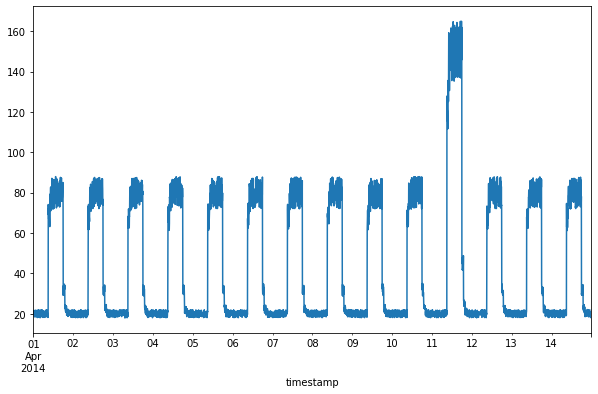

In [15]:
# Creating another subplot
fig, ax = plt.subplots(figsize=(10,6))

# Use pandas to plot the second data frame
df_daily_jumpsup.plot(legend=False, ax=ax);

<br>

## Pre-Processing
***

Here, we prepare the data we are going to use to train the model by doing calculations on the dataset with no anomaly using the mean and standard deviation methods.

In [16]:
# get the mean of the no anomaly dataset & store it in var train_mean
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [17]:
# get the standard deviation of the no anomaly dataset & store it in var train_std
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

In [18]:
# divide the difference between each no anomaly value & its mean by the standard deviation
# store the result in a new data frame called df_train_vals
df_train_vals = (df_small_noise - train_mean) / train_std

In [19]:
# Take a look at the top 5 values in the new data frame
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [20]:
# add new cols to the no anomaly dataframe containing the value - mean (less_mean) and
# the new less_mean value divided by the standard deviation (div_std)
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

In [21]:
# lets see what the no anomaly data frame looks like now
df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [22]:
# calculate the mean of the value, less_mean and div_std columns in the data frame
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [23]:
# calculate the standard deviation of the value, less_mean and div_std columns in the data frame
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000018)

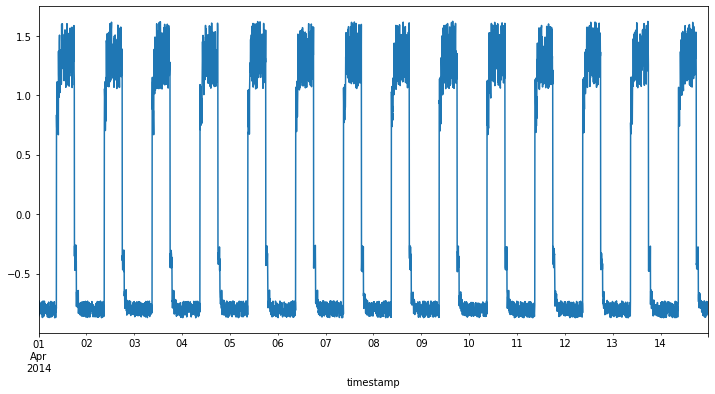

In [24]:
# setting figsize
fig, ax = plt.subplots(figsize=(12,6))

# Plotting the train_vals data frame with pandas
df_train_vals.plot(legend=False, ax=ax);

Compare this plot to the previous one where we plotted df_small_noise (the no anomaly dataset). From a quick glance, the two look the same but upon investigating the values you can see that we have essentially scaled the original values down to be centred around zero in the train_vals, with a standard deviation of approximately 1.

In [25]:
# using shape to see how many values are in the train_vals data frame
df_train_vals.shape

(4032, 1)

In [26]:
# we need to break the train_vals into groups or "windows" so we can look at each value
# in relation to its peers - here we determine the window size will be 288
window_size = 288

In [33]:
# defining a function to split the data into windows
def windows(vals, n=window_size):
  # creating a list L to store the windows
  L = []
  # looping through the data up to range 3745 (where the last window begins - 4032-288+1)
  for i in range(len(vals) - n + 1):
    # append each window to L
    L.append(vals[i:i+n])
  # Stack method will create a 2D numpy array from L
  return np.stack(L)

In [34]:
# pass the train_vals to the windows function & store result in var x_train
x_train = windows(df_train_vals)

In [35]:
# checking value in first index of first window and last index of last window
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [36]:
# checking first and last value in df_train_vals - notice these are the same as above
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

In [37]:
# using shape to check the # of values in x_train
# note that 3745 + 288 -1 = 4032 (the # values in train_vals)
x_train.shape

(3745, 288, 1)

In [38]:
#
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [39]:
# 
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

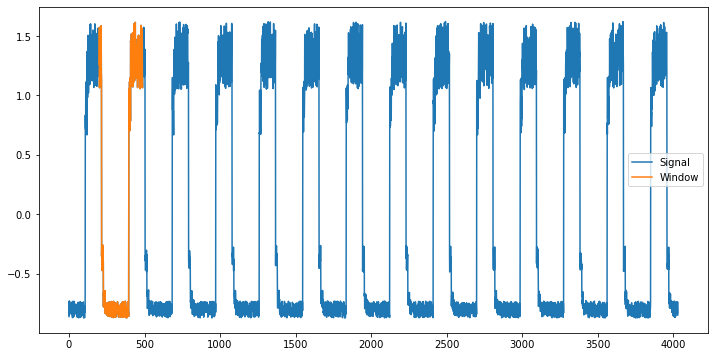

In [40]:
# 
window_no = 200

# 
fig, ax = plt.subplots(figsize=(12, 6))

# 
y = df_train_vals['value'].values

# 
ax.plot(np.arange(y.shape[0]), y, label='Signal')

# The first window.
w = x_train[window_no].flatten()

# 
ax.plot(np.arange(w.shape[0]) + window_no, w, label='Window')

ax.legend();

<br>

## Neural Network
***

In [41]:
x_train.shape

(3745, 288, 1)

In [42]:
#
layers = [
  #
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In [43]:
#
model = keras.Sequential(layers)

In [44]:
# 
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [45]:
# 
model.compile(optimizer=optimizer, loss="mse")

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

In [47]:
# 
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 6s 113ms/step - loss: 0.5719 - val_loss: 0.0949
Epoch 2/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0842 - val_loss: 0.0400
Epoch 3/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0567 - val_loss: 0.0342
Epoch 4/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0468 - val_loss: 0.0289
Epoch 5/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0407 - val_loss: 0.0272
Epoch 6/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0361 - val_loss: 0.0241
Epoch 7/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0323 - val_loss: 0.0225
Epoch 8/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0292 - val_loss: 0.0199
Epoch 9/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0270 - val_loss: 0.0188
Epoch 10/50
27/27 [==============================] - 2s 79ms/step - loss: 0.0255 - val_loss: 0.0188
Epoch 11

<br>

## Evaluation
***

In [48]:
history.history["loss"]

[0.5719166994094849,
 0.08417190611362457,
 0.056650418788194656,
 0.04679909721016884,
 0.040721651166677475,
 0.03607506304979324,
 0.03225387632846832,
 0.029241474345326424,
 0.027009759098291397,
 0.02548358403146267,
 0.02411569654941559,
 0.023067612200975418,
 0.022173909470438957,
 0.021421952173113823,
 0.020734943449497223,
 0.02001352049410343,
 0.01925799995660782,
 0.018666492775082588,
 0.018082402646541595,
 0.017489196732640266,
 0.016927486285567284,
 0.016409805044531822,
 0.015932751819491386,
 0.01536435168236494,
 0.014842364937067032,
 0.014427851885557175,
 0.013891369104385376,
 0.013381668366491795,
 0.012901920825242996,
 0.012483282014727592,
 0.012079252861440182,
 0.011736266314983368,
 0.011389519087970257,
 0.011020141653716564,
 0.010762679390609264,
 0.010485373437404633,
 0.010250949300825596,
 0.010076316073536873,
 0.00981109868735075,
 0.009600061923265457,
 0.009360959753394127,
 0.009226199239492416,
 0.00897052139043808,
 0.008788914419710636,
 

In [49]:
history.history["val_loss"]

[0.09492319077253342,
 0.04001881927251816,
 0.03421654924750328,
 0.02893071062862873,
 0.027248172089457512,
 0.024142852053046227,
 0.022471901029348373,
 0.01987442746758461,
 0.018810465931892395,
 0.018756376579403877,
 0.01932164467871189,
 0.019240353256464005,
 0.019902892410755157,
 0.018469054251909256,
 0.01896640472114086,
 0.017663849517703056,
 0.017982153221964836,
 0.01694275438785553,
 0.016922660171985626,
 0.016064781695604324,
 0.01439199410378933,
 0.014766784384846687,
 0.014318790286779404,
 0.012969010509550571,
 0.012889574281871319,
 0.01317792758345604,
 0.012162999249994755,
 0.011558257974684238,
 0.011781956069171429,
 0.010109296068549156,
 0.011599600315093994,
 0.011161773465573788,
 0.010010020807385445,
 0.01019982062280178,
 0.010370690375566483,
 0.010037433356046677,
 0.009275856427848339,
 0.008824869990348816,
 0.00961067620664835,
 0.009697793051600456,
 0.0095105255022645,
 0.009333580732345581,
 0.008649005554616451,
 0.008549774996936321,
 0

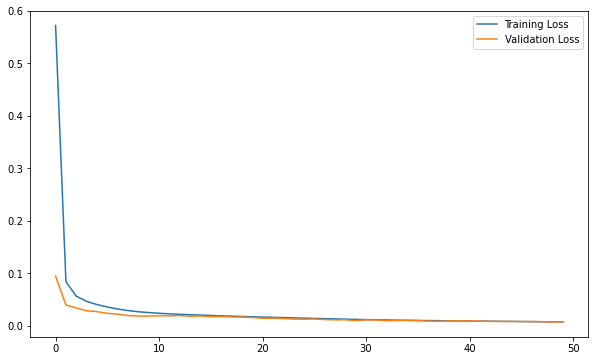

In [50]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.plot(history.history["loss"], label="Training Loss")
# 
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();

In [51]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

118/118 [==============================] - 2s 13ms/step


In [52]:
# Calculate loss...
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

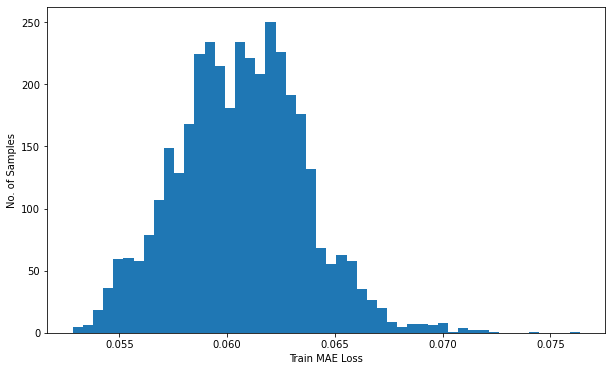

In [53]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.hist(train_mae_loss, bins=50)
# 
ax.set_xlabel("Train MAE Loss")
#
ax.set_ylabel("No. of Samples");

In [54]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# 
threshold

0.07636989123220933

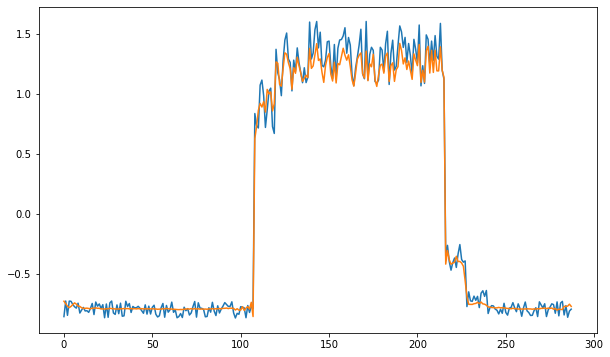

In [55]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
ax.plot(x_train[0])

# 
ax.plot(x_train_pred[0]);

In [56]:
# 
df_test_value = (df_daily_jumpsup - train_mean) / train_std

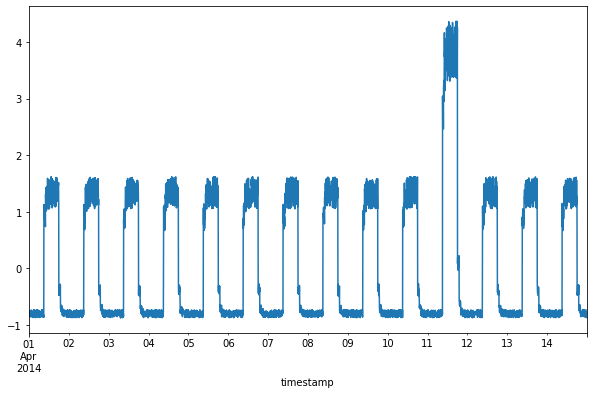

In [57]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_test_value.plot(legend=False, ax=ax);

In [58]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

x_test.shape

(3745, 288, 1)

In [59]:
# 
x_test_pred = model.predict(x_test)

118/118 [==============================] - 2s 13ms/step


In [60]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

array([[0.06231434],
       [0.06287033],
       [0.05965099],
       ...,
       [0.06328866],
       [0.06371686],
       [0.06277019]])

In [61]:
# 
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

array([0.06231434, 0.06287033, 0.05965099, ..., 0.06328866, 0.06371686,
       0.06277019])

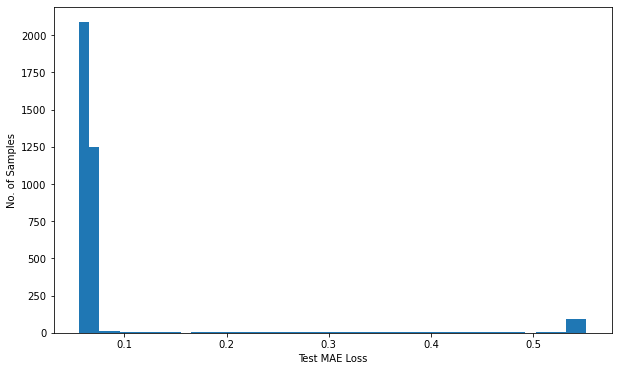

In [62]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

#
ax.hist(test_mae_loss, bins=50)

# 
ax.set_xlabel("Test MAE Loss")

# 
ax.set_ylabel("No. of Samples");

In [63]:
# Detect all the samples which are anomalies
anomalies = test_mae_loss > threshold

# Number of anomalies
np.sum(anomalies)

405

In [64]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [65]:
# 
df_subset = df_daily_jumpsup.iloc[inds]

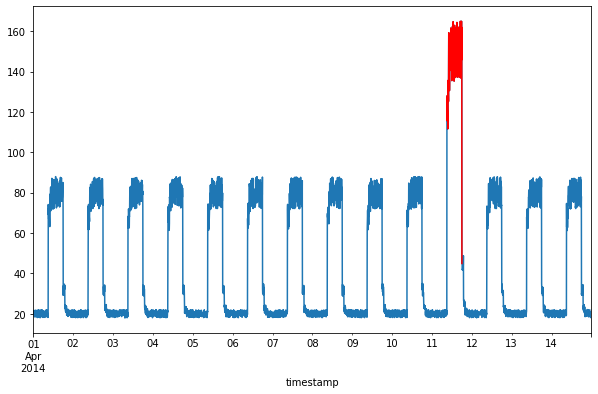

In [66]:
#
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_daily_jumpsup.plot(legend=False, ax=ax)

# 
df_subset.plot(legend=False, ax=ax, color="r");

<br>

## Conclusion
***

In conclusion....

<br>

## References
***

https://machinelearningmastery.com/lstm-autoencoders/  
https://medium.com/towards-artificial-intelligence/autoencoder-for-anomaly-detection-using-tensorflow-keras-7fdfa9f3ad99  
https://towardsdatascience.com/time-series-of-price-anomaly-detection-with-lstm-11a12ba4f6d9  

<br>

# End
***